In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
thefts = pd.read_csv("../dataset/final/valid_train_thefts.csv")
non_thefts = pd.read_csv("../dataset/final/valid_train_non_theft_suc_theft_acct.csv")
non_thefts2 = pd.read_csv("../dataset/final/non_thefts_k_100000.csv")

df = pd.concat([thefts, non_thefts])
df.drop(columns=['acct', 'successor', 'voltage'], inplace=True)
df.fillna(-1, inplace=True)

In [4]:
tmp = pd.concat([non_thefts, non_thefts2[:5000]])

In [5]:
thefts.std_energy_per_day.min(), thefts.std_energy_per_day.max(), tmp.std_energy_per_day.min(), tmp.std_energy_per_day.max(), 

(0.0, 4040.073314172515, 0.0, 5360.0)

In [6]:
df = df.astype('float64')
df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,median_measurement_interval_in_days,days_since_last_measurement,parno,xrhsh,contract_capacity,acct_control,number_of_requests,target
0,12.0,2.0,18.950000,0.000000,6.735356,7.049180,4.964937,350.0,15.0,144.181818,122.0,152.0,0.0,1.0,12.0,0.0,0.0,1.0
1,13.0,2.0,12.071429,0.000000,7.221644,10.070525,4.807979,243.0,6.0,122.416667,121.0,341.0,0.0,1.0,12.0,0.0,1.0,1.0
2,5.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,125.0,120.0,122.250000,122.0,1251.0,2.0,1.0,25.0,0.0,3.0,1.0
3,6.0,1.0,9.434066,4.546448,5.873035,4.989218,1.803735,371.0,68.0,197.200000,182.0,190.0,2.0,6.0,25.0,0.0,0.0,1.0
4,8.0,0.0,19.565574,1.910569,10.585130,10.008197,5.580233,246.0,121.0,139.142857,121.0,821.0,3.0,1.0,35.0,0.0,5.0,1.0


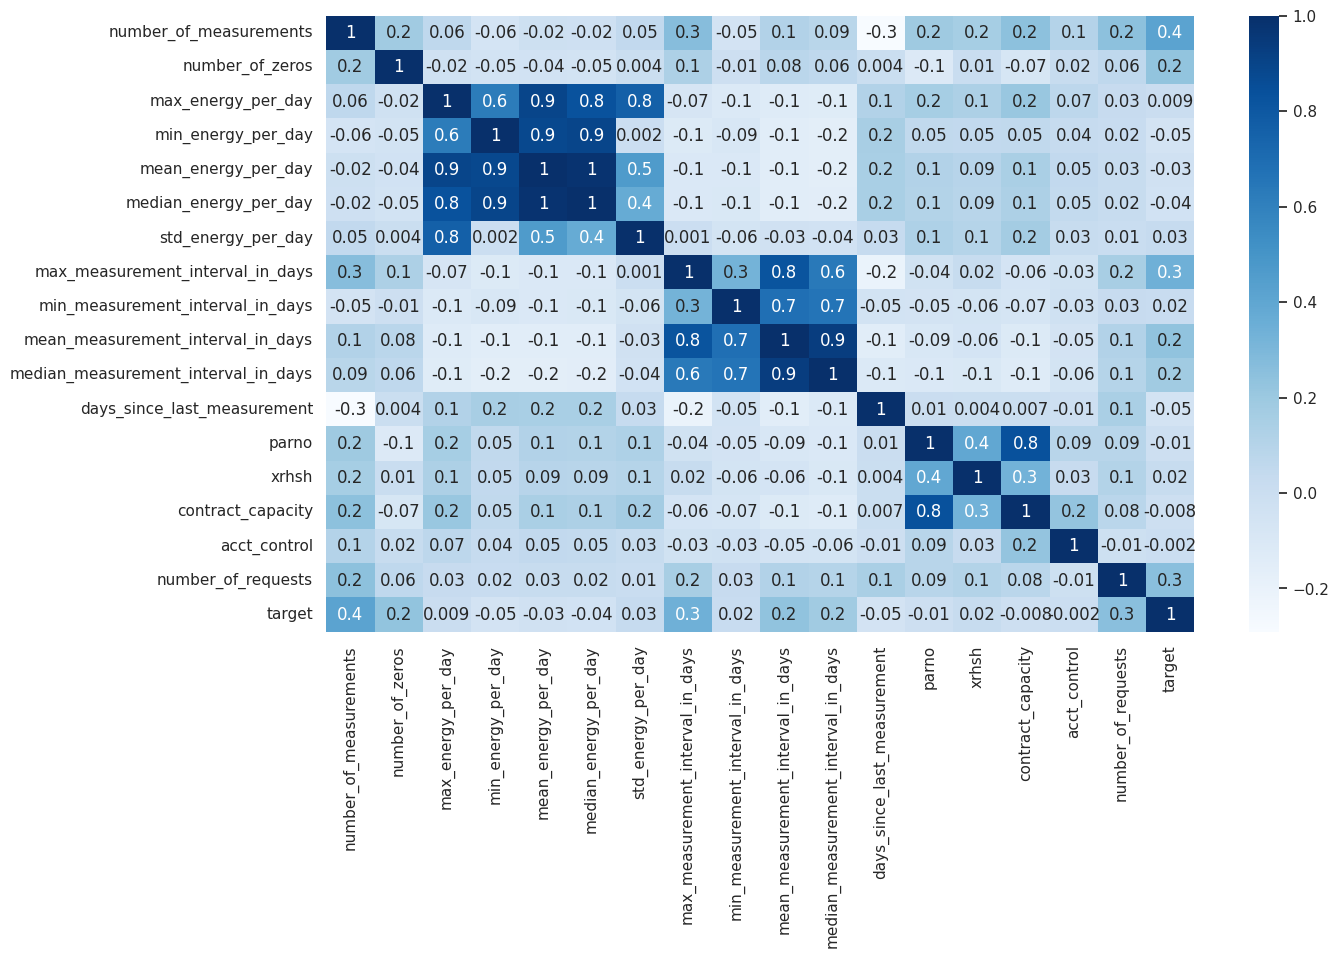

In [7]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [8]:
thefts_new = pd.read_csv("../dataset/final/thefts_final.csv")
non_thefts_new = pd.read_csv("../dataset/final/non_thefts_final.csv")

In [9]:
thefts_new.head()

,ID,XRHSH,CONTRACT_CAPACITY,MEASUREMENT_DATE,CSS_MS_HS_USE,INITIAL_DETECTION_DATE,TARGET
0,100040-1,1,12.0,"['2018-03-29', '2018-08-01', '2018-11-29', '20...","[1116, 397, 575, 0, 0, 2328, 880, 1148, 860, 8...",2019-11-14,1
1,100915-1,1,12.0,"['2018-01-16', '2018-05-16', '2018-09-14', '20...","[609, 1, 0, 0, 368, 1171, 1521, 2523, 1382, 13...",2022-02-02,1
2,101153-1,1,25.0,"['2018-03-27', '2018-07-30', '2018-11-27', '20...","[0, 0, 0, 0, 0]",2021-04-11,1
3,101214-1,6,25.0,"['2019-10-12', '2019-12-19', '2020-12-24', '20...","[0, 371, 1851, 1717, 832, 899]",2019-12-10,1
4,102718-1,1,35.0,"['2018-01-31', '2018-06-01', '2018-10-01', '20...","[1706, 1499, 2387, 1954, 983, 1221, 470, 720]",2020-09-23,1


In [10]:
non_thefts_new.head()

,ID,XRHSH,CONTRACT_CAPACITY,MEASUREMENT_DATE,CSS_MS_HS_USE,TARGET
0,0-1,2,12.0,"['2018-03-30', '2018-11-30', '2019-12-02', '20...","[12, 33, 77, 135]",0
1,0-2,2,12.0,"['2020-07-02', '2020-08-04', '2020-09-17', '20...","[0, 52, 67, 120, 34, 35, 41, 127, 43]",0
2,1-5,2,25.0,"['2018-03-28', '2018-08-01', '2018-11-28', '20...","[4332, 3875, 4556, 3895, 3871, 3841, 5049, 353...",0
3,10-2,1,25.0,"['2018-03-05', '2018-07-04', '2018-07-17']","[1704, 1147, 25]",0
4,10-3,1,25.0,"['2018-09-11', '2018-11-02', '2019-03-01', '20...","[0, 602, 1076, 747, 1477, 1648, 1685, 717, 115...",0


In [11]:
thefts_new[['acct', 'successor']] = thefts_new['ID'].str.split('-', expand=True)
thefts_new['acct'] = thefts_new['acct'].astype(int)
thefts_new['successor'] = thefts_new['successor'].astype(int)
thefts_new.drop(['ID', 'XRHSH', 'CONTRACT_CAPACITY', 'INITIAL_DETECTION_DATE'], axis=1, inplace=True)

non_thefts_new[['acct', 'successor']] = non_thefts_new['ID'].str.split('-', expand=True)
non_thefts_new['acct'] = non_thefts_new['acct'].astype(int)
non_thefts_new['successor'] = non_thefts_new['successor'].astype(int)
non_thefts_new.drop(['ID', 'XRHSH', 'CONTRACT_CAPACITY'], axis=1, inplace=True)

In [12]:
thefts_new['CSS_MS_HS_USE'] = thefts_new['CSS_MS_HS_USE'].apply(lambda x: eval(x))
thefts_new['MEASUREMENT_DATE'] = thefts_new['MEASUREMENT_DATE'].apply(lambda x: eval(x))

non_thefts_new['CSS_MS_HS_USE'] = non_thefts_new['CSS_MS_HS_USE'].apply(lambda x: eval(x))
non_thefts_new['MEASUREMENT_DATE'] = non_thefts_new['MEASUREMENT_DATE'].apply(lambda x: eval(x))

In [13]:
thefts_new.head()

,MEASUREMENT_DATE,CSS_MS_HS_USE,TARGET,acct,successor
0,"[2018-03-29, 2018-08-01, 2018-11-29, 2019-11-1...","[1116, 397, 575, 0, 0, 2328, 880, 1148, 860, 8...",1,100040,1
1,"[2018-01-16, 2018-05-16, 2018-09-14, 2019-01-1...","[609, 1, 0, 0, 368, 1171, 1521, 2523, 1382, 13...",1,100915,1
2,"[2018-03-27, 2018-07-30, 2018-11-27, 2019-03-2...","[0, 0, 0, 0, 0]",1,101153,1
3,"[2019-10-12, 2019-12-19, 2020-12-24, 2021-06-2...","[0, 371, 1851, 1717, 832, 899]",1,101214,1
4,"[2018-01-31, 2018-06-01, 2018-10-01, 2019-01-3...","[1706, 1499, 2387, 1954, 983, 1221, 470, 720]",1,102718,1


In [14]:
non_thefts_new.head()

,MEASUREMENT_DATE,CSS_MS_HS_USE,TARGET,acct,successor
0,"[2018-03-30, 2018-11-30, 2019-12-02, 2020-07-02]","[12, 33, 77, 135]",0,0,1
1,"[2020-07-02, 2020-08-04, 2020-09-17, 2020-12-0...","[0, 52, 67, 120, 34, 35, 41, 127, 43]",0,0,2
2,"[2018-03-28, 2018-08-01, 2018-11-28, 2019-03-2...","[4332, 3875, 4556, 3895, 3871, 3841, 5049, 353...",0,1,5
3,"[2018-03-05, 2018-07-04, 2018-07-17]","[1704, 1147, 25]",0,10,2
4,"[2018-09-11, 2018-11-02, 2019-03-01, 2019-07-0...","[0, 602, 1076, 747, 1477, 1648, 1685, 717, 115...",0,10,3


In [15]:
acct_nbrs = thefts_new['acct'].values

non_thefts_new = non_thefts_new.loc[non_thefts_new['acct'].isin(acct_nbrs)]
non_thefts_new = non_thefts_new.reset_index(drop=True)
non_thefts_new.head()

,MEASUREMENT_DATE,CSS_MS_HS_USE,TARGET,acct,successor
0,"[2022-01-24, 2022-02-02, 2022-05-17, 2022-09-16]","[0, 103, 945, 1325]",0,100915,2
1,"[2020-10-01, 2021-02-10, 2021-06-02, 2021-10-0...","[0, 796, 628, 726, 904, 755]",0,102718,2
2,"[2022-04-06, 2022-04-12, 2022-08-11]","[0, 6, 516]",0,103875,2
3,"[2018-04-24, 2018-06-20, 2018-10-10]","[0, 995, 1429]",0,10539,2
4,"[2018-02-09, 2018-06-13, 2018-10-11, 2019-02-0...","[2360, 435, 429, 489, 389, 574, 980, 1730, 365...",0,10607,1


In [16]:
def extract_month(date_str):
    date_obj = pd.to_datetime(date_str)
    return date_obj.month

In [17]:
def get_measurements_interval(df):
    df = df.copy()
    # create new columns with default value of -1
    df['Month_2'] = 0
    df['Month_2_counts'] = 0
    df['Month_5'] = 0
    df['Month_5_counts'] = 0
    df['Month_8'] = 0
    df['Month_8_counts'] = 0
    df['Month_11'] = 0
    df['Month_11_counts'] = 0
    
    for i, row in df.iterrows():
        if i % 1000 == 0:
            print(i, len(df))
        measurement_dates = row['MEASUREMENT_DATE']
        css_ms_use = row['CSS_MS_HS_USE']

        for date_str, value in zip(measurement_dates, css_ms_use):
            month = extract_month(date_str)

            if month in [12, 1, 2]:
                if df.at[i, 'Month_2'] == 0:
                    df.at[i, 'Month_2'] = value
                else:
                    df.at[i, 'Month_2'] += value
                df.at[i, 'Month_2_counts'] +=1 
            elif month in [3, 4, 5]:
                if df.at[i, 'Month_5'] == 0:
                    df.at[i, 'Month_5'] = value
                else:
                    df.at[i, 'Month_5'] += value
                df.at[i, 'Month_5_counts'] +=1
            elif month in [6, 7, 8]:
                if df.at[i, 'Month_8'] == 0:
                    df.at[i, 'Month_8'] = value
                else:
                    df.at[i, 'Month_8'] += value
                df.at[i, 'Month_8_counts'] +=1
            elif month in [9, 10, 11]:
                if df.at[i, 'Month_11'] == 0:
                    df.at[i, 'Month_11'] = value
                else:
                    df.at[i, 'Month_11'] += value
                df.at[i, 'Month_11_counts'] +=1
    return df

In [18]:
thefts_new = get_measurements_interval(thefts_new)
non_thefts_new = get_measurements_interval(non_thefts_new)

0 1555
1000 1555
0 2094
1000 2094
2000 2094


In [19]:
thefts_df_new = pd.merge(thefts, thefts_new[[
    'Month_2','Month_5','Month_8','Month_11',
    'Month_2_counts','Month_5_counts','Month_8_counts','Month_11_counts',
    'acct','successor']], on=['acct', 'successor'])
non_thefts_df_new = pd.merge(non_thefts, non_thefts_new[[
    'Month_2','Month_5','Month_8','Month_11',
    'Month_2_counts','Month_5_counts','Month_8_counts','Month_11_counts',
    'acct','successor']], on=['acct', 'successor'])

In [20]:
thefts_df_new.head()

,acct,successor,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,...,number_of_requests,target,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts
0,100040,1,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,...,0,1,1740,4538,4432,575,2,3,4,3
1,100915,1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,...,1,1,4901,1701,0,4503,6,3,0,4
2,101153,1,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,...,3,1,0,0,0,0,0,2,2,1
3,101214,1,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,...,0,1,3054,0,2616,0,3,0,2,1
4,102718,1,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,...,5,1,3660,983,1969,4328,2,1,2,3


In [21]:
non_thefts_df_new.head()

,acct,successor,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,...,number_of_requests,target,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts
0,100915,2,4,0,11.444444,9.086538,10.463880,10.860656,1.002664,122,...,0,0,103,945,0,1325,2,1,0,1
1,102718,2,6,0,7.290323,5.607143,6.254461,6.030303,0.568356,132,...,0,0,1700,0,1383,726,2,0,2,2
2,103875,2,3,0,4.264463,1.000000,2.632231,2.632231,1.632231,121,...,0,0,0,6,516,0,0,2,1,0
3,10539,2,3,0,17.456140,12.758929,15.107534,15.107534,2.348606,112,...,2,0,0,0,995,1429,0,1,1,1
4,10607,1,10,0,20.971014,2.967480,6.842664,3.920000,6.070888,250,...,1,0,3214,1447,1804,2733,3,1,3,3


In [22]:
thefts_df_new.number_of_measurements.min(), thefts_df_new.number_of_measurements.max()

(1, 57)

In [23]:
non_thefts_df_new.number_of_measurements.min(), thefts_df_new.number_of_measurements.max()

(1, 57)

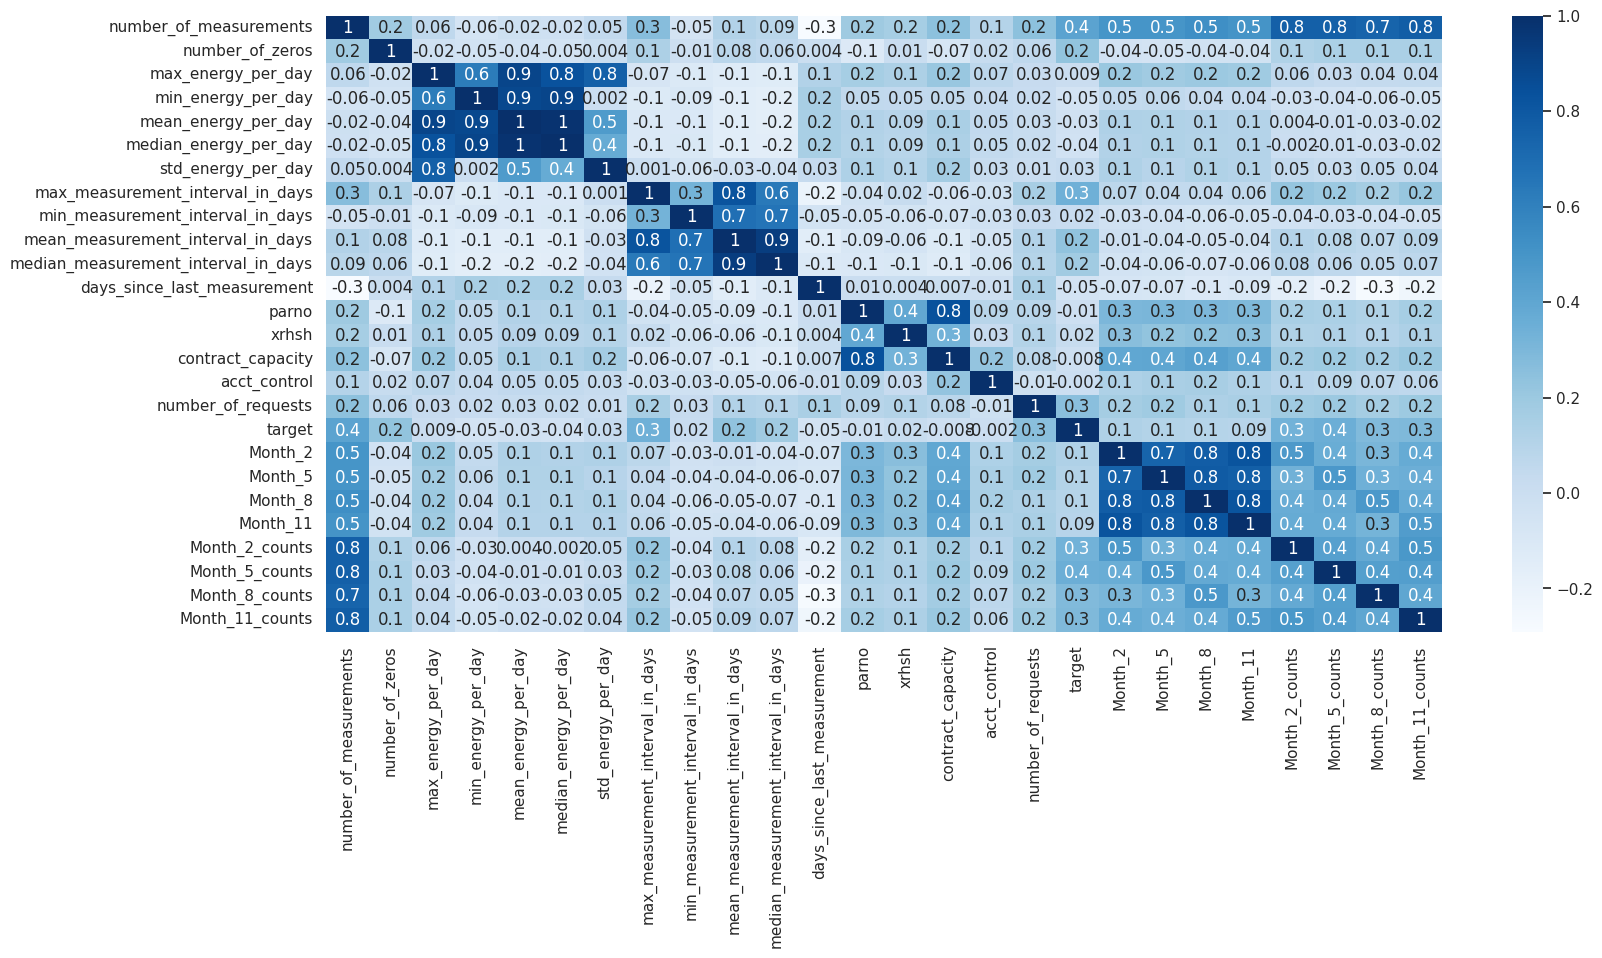

In [31]:
new_df = pd.concat([thefts_df_new, non_thefts_df_new])
new_df.drop(columns=['acct', 'successor', 'voltage'], inplace=True)
new_df.fillna(-1, inplace=True)
plt.figure(figsize=(18,8))
sns.set_theme(style="white")
corr = new_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [32]:
new_df.columns

Index(['number_of_measurements', 'number_of_zeros', 'max_energy_per_day',
       'min_energy_per_day', 'mean_energy_per_day', 'median_energy_per_day',
       'std_energy_per_day', 'max_measurement_interval_in_days',
       'min_measurement_interval_in_days', 'mean_measurement_interval_in_days',
       'median_measurement_interval_in_days', 'days_since_last_measurement',
       'parno', 'xrhsh', 'contract_capacity', 'acct_control',
       'number_of_requests', 'target', 'Month_2', 'Month_5', 'Month_8',
       'Month_11', 'Month_2_counts', 'Month_5_counts', 'Month_8_counts',
       'Month_11_counts'],
      dtype='object')

In [33]:
new_df['max_energy_per_day_contract'] = new_df['max_energy_per_day'] / new_df['contract_capacity']
new_df['min_energy_per_day_contract'] = new_df['min_energy_per_day'] / new_df['contract_capacity']
new_df['mean_energy_per_day_contract'] = new_df['mean_energy_per_day'] / new_df['contract_capacity']
new_df['median_energy_per_day_contract'] = new_df['median_energy_per_day'] / new_df['contract_capacity']
new_df['std_energy_per_day_contract'] = new_df['std_energy_per_day'] / new_df['contract_capacity']
new_df['max_measurement_interval_in_days_contract'] = new_df['max_measurement_interval_in_days'] / new_df['contract_capacity']
new_df['min_measurement_interval_in_days_contract'] = new_df['min_measurement_interval_in_days'] / new_df['contract_capacity']
new_df['mean_measurement_interval_in_days_contract'] = new_df['mean_measurement_interval_in_days'] / new_df['contract_capacity']
new_df['median_measurement_interval_in_days_contract'] = new_df['median_measurement_interval_in_days'] / new_df['contract_capacity']
new_df['days_since_last_measurement_contract'] = new_df['days_since_last_measurement'] / new_df['contract_capacity']
new_df['Month_2_contract'] = new_df['Month_2'] / new_df['contract_capacity']
new_df['Month_5_contract'] = new_df['Month_5'] / new_df['contract_capacity']
new_df['Month_8_contract'] = new_df['Month_8'] / new_df['contract_capacity']
new_df['Month_11_contract'] = new_df['Month_11'] / new_df['contract_capacity']
new_df['Month_2_counts_contract'] = new_df['Month_2_counts'] / new_df['contract_capacity']
new_df['Month_5_counts_contract'] = new_df['Month_5_counts'] / new_df['contract_capacity']
new_df['Month_8_counts_contract'] = new_df['Month_8_counts'] / new_df['contract_capacity']
new_df['Month_11_counts_contract'] = new_df['Month_11_counts'] / new_df['contract_capacity']
new_df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,median_measurement_interval_in_days_contract,days_since_last_measurement_contract,Month_2_contract,Month_5_contract,Month_8_contract,Month_11_contract,Month_2_counts_contract,Month_5_counts_contract,Month_8_counts_contract,Month_11_counts_contract
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,...,10.166667,12.666667,145.000000,378.166667,369.333333,47.916667,0.166667,0.250000,0.333333,0.250000
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,...,10.083333,28.416667,408.416667,141.750000,0.000000,375.250000,0.500000,0.250000,0.000000,0.333333
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,...,4.880000,50.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.080000,0.040000
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,...,7.280000,7.600000,122.160000,0.000000,104.640000,0.000000,0.120000,0.000000,0.080000,0.040000
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,...,3.457143,23.457143,104.571429,28.085714,56.257143,123.657143,0.057143,0.028571,0.057143,0.085714


In [35]:
#selected_cols = [col for col in list(new_df.columns) if "contract" in col]
#selected_cols.append('target')
#tmp_df = new_df[selected_cols]

In [40]:
new_df.fillna(-1, inplace=True)
#plt.figure(figsize=(20,8))
#sns.set_theme(style="white")
#corr = new_df.corr()
#heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [41]:
len(new_df.columns)

44

In [56]:
df = new_df.copy()
#df.drop(['xrhsh', 'parno', 'acct_control', 'contract_capacity', 'min_measurement_interval_in_days', 'max_energy_per_day'], axis=1, inplace=True)
print("Bincount of y:", df['target'].value_counts())
"""plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')"""

Bincount of y: 0    2094
1    1555
Name: target, dtype: int64


'plt.figure(figsize=(14,8))\nsns.set_theme(style="white")\ncorr = df.corr()\nheatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt=\'.1g\')'

In [43]:
df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,median_measurement_interval_in_days_contract,days_since_last_measurement_contract,Month_2_contract,Month_5_contract,Month_8_contract,Month_11_contract,Month_2_counts_contract,Month_5_counts_contract,Month_8_counts_contract,Month_11_counts_contract
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,...,10.166667,12.666667,145.000000,378.166667,369.333333,47.916667,0.166667,0.250000,0.333333,0.250000
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,...,10.083333,28.416667,408.416667,141.750000,0.000000,375.250000,0.500000,0.250000,0.000000,0.333333
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,...,4.880000,50.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.080000,0.040000
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,...,7.280000,7.600000,122.160000,0.000000,104.640000,0.000000,0.120000,0.000000,0.080000,0.040000
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,...,3.457143,23.457143,104.571429,28.085714,56.257143,123.657143,0.057143,0.028571,0.057143,0.085714


In [44]:
# define X and y
X = df.drop('target', axis=1)
y = df['target']

In [45]:
import sys
import os

from pathlib import Path

parent = Path(os.path.abspath("")).resolve().parents[0]
if parent not in sys.path:
    sys.path.insert(0, str(parent))


from types import SimpleNamespace

import torch

from torch.utils.data import DataLoader

from models.mlp import MLP
from utils.data_utils import TorchDataset

from utils.metrics import get_classification_metrics, get_probability_measures, get_lift_demotion_scores

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [46]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
scaler = MinMaxScaler()

In [48]:
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
cat_clf = CatBoostClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
clfs = {'RandomForest': rf_clf, 'SVM': svm_clf, 'kNN': knn_clf,
        'LogisticRegression': lr_clf,'DecisionTree': dt_clf,
        'XGB': xgb_clf,
       'CatBoost': cat_clf, 'MLP': None}

In [49]:
for clf_name, clf in clfs.items():
    # Initialize the evaluation metrics lists
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    brier_scores, auc_roc_scores, pr_auc_scores = [], [], []
    lift_scores, demotion_scores, weighted_scores = [], [], []
    

    print("Classifier:", clf_name)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        if clf_name == "CatBoost":
            clf.fit(X_train, y_train, verbose=False)
            
        elif clf_name == "MLP":
            train_dataset = TorchDataset(X=torch.tensor(X_train).float(), y=torch.tensor(y_train.to_numpy()).float())  # reconstruction
            test_dataset = TorchDataset(X=torch.tensor(X_test).float(), y=torch.tensor(y_test.to_numpy()).float())

            train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
            clf = MLP(in_size=X_train.shape[1], layer_units=[16, 32, 64], out_size=1, vae=False)
            optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3)
            criterion = torch.nn.BCEWithLogitsLoss()
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
            args = dict(model=clf, train_loader=train_loader, test_loader=test_loader,
            epochs=100, optimizer=optimizer, criterion=criterion,
            reconstruction=False, vae=False, device=device, verbose=False, return_best=True)
            args = SimpleNamespace(**args)
            clf = clf.fit(args)
            
        else:
            clf.fit(X_train, y_train)

        if clf_name != "MLP":
            y_pred = clf.predict(X_test)

            acc, precision, recall, f1 = get_classification_metrics(y_test.values, y_pred)
            
            y_scores = clf.predict_proba(X_test)
            idx = np.argmax(y_scores, axis=1)
            y_scores = np.where(idx == 0, 1 - y_scores[:, 0], y_scores[:, 1])


            brier, roc_auc, pr_auc = get_probability_measures(y_test.values, y_scores)

            num_ones = np.sum(y_test == 1)
            lift, demotion, weighted_score = get_lift_demotion_scores(y_test.values, y_scores,
                                                                      num_samples=int(0.1 * num_ones))
        else:
            args = dict(
                model=clf,
                data_loader=test_loader, criterion=criterion,
            reconstruction=False, vae=False, device=device)
            args = SimpleNamespace(**args)
            _, acc, precision, recall, f1, brier, roc_auc, pr_auc, lift, demotion, weighted_score = clf.predict(
                args
            )
        
        acc_scores.append(acc)
        prec_scores.append(precision)
        rec_scores.append(recall)
        f1_scores.append(f1)
        
        brier_scores.append(brier)
        auc_roc_scores.append(roc_auc)
        pr_auc_scores.append(pr_auc)
        
        lift_scores.append(lift)
        demotion_scores.append(demotion)
        weighted_scores.append(weighted_score)
        
        print("Fold {} - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}"
              .format(len(acc_scores), acc_scores[-1], prec_scores[-1], rec_scores[-1], f1_scores[-1],
                     brier_scores[-1], auc_roc_scores[-1], pr_auc_scores[-1],
                     lift_scores[-1], demotion_scores[-1], weighted_scores[-1]))

    print("Average - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}\n"
          .format(sum(acc_scores)/len(acc_scores), sum(prec_scores)/len(prec_scores),
                  sum(rec_scores)/len(rec_scores), sum(f1_scores)/len(f1_scores),
                 sum(brier_scores)/len(brier_scores), sum(auc_roc_scores)/len(auc_roc_scores), sum(pr_auc_scores)/len(pr_auc_scores),
                 sum(lift_scores)/len(lift_scores), sum(demotion_scores)/len(demotion_scores), sum(weighted_scores)/len(weighted_scores)))


Classifier: RandomForest
Fold 1 - Accuracy: 0.7767, Precision: 0.7606, Recall: 0.6945, F1: 0.7261, Brier: 0.1573, AUC-ROC: 0.8475, PR-AUC: 0.8003, Lift: 0.9677, Demotion: 0.9677, Weighted: 0.9677
Fold 2 - Accuracy: 0.7781, Precision: 0.7633, Recall: 0.6945, F1: 0.7273, Brier: 0.1477, AUC-ROC: 0.8676, PR-AUC: 0.8395, Lift: 1.0000, Demotion: 1.0000, Weighted: 1.0000
Fold 3 - Accuracy: 0.7534, Precision: 0.7399, Recall: 0.6495, F1: 0.6918, Brier: 0.1667, AUC-ROC: 0.8255, PR-AUC: 0.7969, Lift: 1.0000, Demotion: 1.0000, Weighted: 1.0000
Fold 4 - Accuracy: 0.7493, Precision: 0.7302, Recall: 0.6527, F1: 0.6893, Brier: 0.1722, AUC-ROC: 0.8148, PR-AUC: 0.7775, Lift: 0.9677, Demotion: 0.9677, Weighted: 0.9677
Fold 5 - Accuracy: 0.7764, Precision: 0.7803, Recall: 0.6624, F1: 0.7165, Brier: 0.1576, AUC-ROC: 0.8447, PR-AUC: 0.8095, Lift: 0.9677, Demotion: 0.9677, Weighted: 0.9677
Average - Accuracy: 0.7668, Precision: 0.7549, Recall: 0.6707, F1: 0.7102, Brier: 0.1603, AUC-ROC: 0.8400, PR-AUC: 0.804

Best loss (0.2577) found on epoch 47
Fold 5 - Accuracy: 0.7517, Precision: 0.7876, Recall: 0.5723, F1: 0.6629, Brier: 0.1663, AUC-ROC: 0.8319, PR-AUC: 0.8080, Lift: 1.0000, Demotion: 0.9032, Weighted: 0.9710
Average - Accuracy: 0.7553, Precision: 0.7888, Recall: 0.5807, F1: 0.6686, Brier: 0.1657, AUC-ROC: 0.8352, PR-AUC: 0.8028, Lift: 0.9742, Demotion: 0.9613, Weighted: 0.9703



In [50]:
#from sklearn.feature_selection import RFECV

# assume your dataframe is named 'df'
#X = df.drop('target', axis=1)
#y = df['target']

# create a CatBoost classifier object
#clf = CatBoostClassifier(random_state=42, verbose=False)

# create a recursive feature elimination object
#rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy', n_jobs=-1)

# fit the recursive feature elimination object on the data
#rfecv.fit(X, y)

# print the selected features
#print("Selected Features:", X.columns[rfecv.support_])


Selected Features: Index(['number_of_measurements', 'std_energy_per_day',
       'max_measurement_interval_in_days', 'min_measurement_interval_in_days',
       'mean_measurement_interval_in_days',
       'median_measurement_interval_in_days', 'days_since_last_measurement',
       'number_of_requests', 'Month_2', 'Month_5', 'Month_11',
       'min_energy_per_day_contract', 'mean_energy_per_day_contract',
       'median_energy_per_day_contract', 'std_energy_per_day_contract',
       'max_measurement_interval_in_days_contract',
       'min_measurement_interval_in_days_contract',
       'days_since_last_measurement_contract', 'Month_8_contract',
       'Month_5_counts_contract'],
      dtype='object')


In [52]:
#rfecv.ranking_
#array([ 1,  3,  2,  9, 14,  6,  1,  1,  1,  1,  1,  1, 22, 21, 23, 24,  1,
#        1,  1, 15,  1, 16,  4, 19, 20, 17,  1,  1,  1,  1,  1,  1, 13,  5,
#        1, 12,  7,  1, 10,  8,  1, 11, 18])



array([ 1,  3,  2,  9, 14,  6,  1,  1,  1,  1,  1,  1, 22, 21, 23, 24,  1,
        1,  1, 15,  1, 16,  4, 19, 20, 17,  1,  1,  1,  1,  1,  1, 13,  5,
        1, 12,  7,  1, 10,  8,  1, 11, 18])

In [53]:
df.columns

Index(['number_of_measurements', 'number_of_zeros', 'max_energy_per_day',
       'min_energy_per_day', 'mean_energy_per_day', 'median_energy_per_day',
       'std_energy_per_day', 'max_measurement_interval_in_days',
       'min_measurement_interval_in_days', 'mean_measurement_interval_in_days',
       'median_measurement_interval_in_days', 'days_since_last_measurement',
       'parno', 'xrhsh', 'contract_capacity', 'acct_control',
       'number_of_requests', 'target', 'Month_2', 'Month_5', 'Month_8',
       'Month_11', 'Month_2_counts', 'Month_5_counts', 'Month_8_counts',
       'Month_11_counts', 'max_energy_per_day_contract',
       'min_energy_per_day_contract', 'mean_energy_per_day_contract',
       'median_energy_per_day_contract', 'std_energy_per_day_contract',
       'max_measurement_interval_in_days_contract',
       'min_measurement_interval_in_days_contract',
       'mean_measurement_interval_in_days_contract',
       'median_measurement_interval_in_days_contract',
       'd

In [57]:
df = df[['number_of_measurements', 'std_energy_per_day',
       'max_measurement_interval_in_days', 'min_measurement_interval_in_days',
       'mean_measurement_interval_in_days',
       'median_measurement_interval_in_days', 'days_since_last_measurement',
       'number_of_requests', 'Month_2', 'Month_5', 'Month_11',
       'min_energy_per_day_contract', 'mean_energy_per_day_contract',
       'median_energy_per_day_contract', 'std_energy_per_day_contract',
       'max_measurement_interval_in_days_contract',
       'min_measurement_interval_in_days_contract',
       'days_since_last_measurement_contract', 'Month_8_contract',
       'Month_5_counts_contract', 'target']]

In [58]:
# define X and y
X = df.drop('target', axis=1)
y = df['target']
for clf_name, clf in clfs.items():
    # Initialize the evaluation metrics lists
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    brier_scores, auc_roc_scores, pr_auc_scores = [], [], []
    lift_scores, demotion_scores, weighted_scores = [], [], []
    

    print("Classifier:", clf_name)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        if clf_name == "CatBoost":
            clf.fit(X_train, y_train, verbose=False)
            
        elif clf_name == "MLP":
            train_dataset = TorchDataset(X=torch.tensor(X_train).float(), y=torch.tensor(y_train.to_numpy()).float())  # reconstruction
            test_dataset = TorchDataset(X=torch.tensor(X_test).float(), y=torch.tensor(y_test.to_numpy()).float())

            train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
            clf = MLP(in_size=X_train.shape[1], layer_units=[16, 32, 64], out_size=1, vae=False)
            optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3)
            criterion = torch.nn.BCEWithLogitsLoss()
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
            args = dict(model=clf, train_loader=train_loader, test_loader=test_loader,
            epochs=100, optimizer=optimizer, criterion=criterion,
            reconstruction=False, vae=False, device=device, verbose=False, return_best=True)
            args = SimpleNamespace(**args)
            clf = clf.fit(args)
            
        else:
            clf.fit(X_train, y_train)

        if clf_name != "MLP":
            y_pred = clf.predict(X_test)

            acc, precision, recall, f1 = get_classification_metrics(y_test.values, y_pred)
            
            y_scores = clf.predict_proba(X_test)
            idx = np.argmax(y_scores, axis=1)
            y_scores = np.where(idx == 0, 1 - y_scores[:, 0], y_scores[:, 1])


            brier, roc_auc, pr_auc = get_probability_measures(y_test.values, y_scores)

            num_ones = np.sum(y_test == 1)
            lift, demotion, weighted_score = get_lift_demotion_scores(y_test.values, y_scores,
                                                                      num_samples=int(0.1 * num_ones))
        else:
            args = dict(
                model=clf,
                data_loader=test_loader, criterion=criterion,
            reconstruction=False, vae=False, device=device)
            args = SimpleNamespace(**args)
            _, acc, precision, recall, f1, brier, roc_auc, pr_auc, lift, demotion, weighted_score = clf.predict(
                args
            )
        
        acc_scores.append(acc)
        prec_scores.append(precision)
        rec_scores.append(recall)
        f1_scores.append(f1)
        
        brier_scores.append(brier)
        auc_roc_scores.append(roc_auc)
        pr_auc_scores.append(pr_auc)
        
        lift_scores.append(lift)
        demotion_scores.append(demotion)
        weighted_scores.append(weighted_score)
        
        print("Fold {} - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}"
              .format(len(acc_scores), acc_scores[-1], prec_scores[-1], rec_scores[-1], f1_scores[-1],
                     brier_scores[-1], auc_roc_scores[-1], pr_auc_scores[-1],
                     lift_scores[-1], demotion_scores[-1], weighted_scores[-1]))

    print("Average - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}\n"
          .format(sum(acc_scores)/len(acc_scores), sum(prec_scores)/len(prec_scores),
                  sum(rec_scores)/len(rec_scores), sum(f1_scores)/len(f1_scores),
                 sum(brier_scores)/len(brier_scores), sum(auc_roc_scores)/len(auc_roc_scores), sum(pr_auc_scores)/len(pr_auc_scores),
                 sum(lift_scores)/len(lift_scores), sum(demotion_scores)/len(demotion_scores), sum(weighted_scores)/len(weighted_scores)))


Classifier: RandomForest
Fold 1 - Accuracy: 0.7726, Precision: 0.7491, Recall: 0.7010, F1: 0.7243, Brier: 0.1549, AUC-ROC: 0.8524, PR-AUC: 0.8086, Lift: 0.9677, Demotion: 1.0000, Weighted: 0.9774
Fold 2 - Accuracy: 0.7986, Precision: 0.7887, Recall: 0.7203, F1: 0.7529, Brier: 0.1451, AUC-ROC: 0.8736, PR-AUC: 0.8420, Lift: 1.0000, Demotion: 1.0000, Weighted: 1.0000
Fold 3 - Accuracy: 0.7493, Precision: 0.7302, Recall: 0.6527, F1: 0.6893, Brier: 0.1664, AUC-ROC: 0.8265, PR-AUC: 0.7932, Lift: 1.0000, Demotion: 1.0000, Weighted: 1.0000
Fold 4 - Accuracy: 0.7548, Precision: 0.7391, Recall: 0.6559, F1: 0.6951, Brier: 0.1689, AUC-ROC: 0.8209, PR-AUC: 0.7896, Lift: 1.0000, Demotion: 1.0000, Weighted: 1.0000
Fold 5 - Accuracy: 0.7805, Precision: 0.7828, Recall: 0.6720, F1: 0.7232, Brier: 0.1529, AUC-ROC: 0.8543, PR-AUC: 0.8232, Lift: 1.0000, Demotion: 0.9677, Weighted: 0.9903
Average - Accuracy: 0.7712, Precision: 0.7580, Recall: 0.6804, F1: 0.7169, Brier: 0.1576, AUC-ROC: 0.8455, PR-AUC: 0.811

Best loss (0.2883) found on epoch 26
Fold 5 - Accuracy: 0.7517, Precision: 0.8009, Recall: 0.5563, F1: 0.6565, Brier: 0.1670, AUC-ROC: 0.8322, PR-AUC: 0.8057, Lift: 1.0000, Demotion: 0.9677, Weighted: 0.9903
Average - Accuracy: 0.7523, Precision: 0.7934, Recall: 0.5659, F1: 0.6599, Brier: 0.1682, AUC-ROC: 0.8290, PR-AUC: 0.7966, Lift: 0.9548, Demotion: 0.9742, Weighted: 0.9606

